<a href="https://colab.research.google.com/github/jx-dohwan/Initial_public_offering_price_prediction/blob/main/feature_select_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 공모주 시초가 예측 baseline

In [1]:
# !unzip /content/drive/MyDrive/인공지능/경영빅데이터/data/ipo_원본데이터.zip -d /content/drive/MyDrive/인공지능/경영빅데이터/data

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn import tree
from scipy.stats import pointbiserialr

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [3]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [4]:
df = pd.read_csv('/content/drive/MyDrive/인공지능/경영빅데이터/data/IPOv3_resampled_data.csv')

In [5]:
df = df.drop(['최근 공모주 동향(최근 3개월 내의 종속변수 1인 갯수)','최근 3개월 공모주 수', '희망공모가_하한',  '희망공모가_상한','일반청약자(비율)'], axis=1)

## 데이터 기본 정보 파악

In [6]:
df.head()

,상장 시기(상장월),"최근 ""따"" 비율",공모가,밴드수익률(공모가/공모가_상한),기관경쟁률,청약경쟁률,의무보유확약,대표주간사,IPO 주간사 순위,총 공모주식 수,구주매출(비율),매출액(백만원),순이익(백만원),자본금(백만원),전문투자자(비율),우리사주조합(비율),공모후 상장주식수(주식수),유통가능주식합계(비율),ROE,종속변수
0,5,0.43,14000,1.08,1847.12,2183.29,0.1470,0,9,2000000,0.0,17098,1852,5744,0.75,0.00,11500000,0.2865,32.242340,0
1,12,0.04,6000,0.60,11.35,40.92,0.0000,1,13,2000000,0.0,208,-3714,6908,0.77,0.03,13800000,0.6255,-53.763752,0
2,11,0.10,15000,0.65,64.33,566.54,0.0003,2,8,2400000,0.0,577,-44067,7742,0.80,0.00,15400000,0.2759,-569.194007,1
3,3,0.33,20000,0.65,56.90,7.53,0.0265,3,1,1400000,0.0,32683,4346,367,0.74,0.01,3963211,0.3554,1184.196185,0
4,10,0.07,5000,0.83,140.75,7.01,0.0432,4,1,16900000,0.0,28652,0,13375,0.80,0.00,67500000,0.2500,0.000000,0


In [7]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 832 entries, 0 to 831
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   상장 시기(상장월)         832 non-null    int64  
 1   최근 "따" 비율          832 non-null    float64
 2   공모가                832 non-null    int64  
 3   밴드수익률(공모가/공모가_상한)  832 non-null    float64
 4   기관경쟁률              832 non-null    float64
 5   청약경쟁률              832 non-null    float64
 6   의무보유확약             832 non-null    float64
 7   대표주간사              832 non-null    int64  
 8   IPO 주간사 순위         832 non-null    int64  
 9   총 공모주식 수           832 non-null    int64  
 10  구주매출(비율)           832 non-null    float64
 11  매출액(백만원)           832 non-null    int64  
 12  순이익(백만원)           832 non-null    int64  
 13  자본금(백만원)           832 non-null    int64  
 14  전문투자자(비율)          832 non-null    float64
 15  우리사주조합(비율)         832 non-null    float64
 16  공모후 상장주식수(주식수)     832 non

In [8]:
print(df.describe())

       상장 시기(상장월)   최근 "따" 비율            공모가  밴드수익률(공모가/공모가_상한)        기관경쟁률  \
count  832.000000  832.000000     832.000000         832.000000   832.000000   
mean     6.989183    0.240916   16796.441106           0.976320   849.792655   
std      3.446846    0.175321   14083.652039           0.149491   574.786210   
min      1.000000    0.000000    1300.000000           0.440000     3.770000   
25%      4.000000    0.110000    9689.750000           0.959997   282.230000   
50%      7.000000    0.204336   13894.000000           1.000000   872.061326   
75%     10.000000    0.351009   20000.000000           1.067029  1355.641632   
max     12.000000    0.770000  190000.000000           1.330000  2269.680000   

              청약경쟁률      의무보유확약       대표주간사  IPO 주간사 순위      총 공모주식 수  \
count    832.000000  832.000000  832.000000  832.000000  8.320000e+02   
mean    1474.828357    0.150469    6.524038    7.108173  2.444264e+06   
std     5496.034077    0.153152    5.010881    5.271026  3.2

In [9]:
print(df.isnull().sum())


상장 시기(상장월)           0
최근 "따" 비율            0
공모가                  0
밴드수익률(공모가/공모가_상한)    0
기관경쟁률                0
청약경쟁률                0
의무보유확약               0
대표주간사                0
IPO 주간사 순위           0
총 공모주식 수             0
구주매출(비율)             0
매출액(백만원)             0
순이익(백만원)             0
자본금(백만원)             0
전문투자자(비율)            0
우리사주조합(비율)           0
공모후 상장주식수(주식수)       0
유통가능주식합계(비율)         0
ROE                  0
종속변수                 0
dtype: int64


## feature select

### 1) 상관관계 분석(t-검정이었나)

In [10]:
import pandas as pd

# 데이터프레임 df를 가정합니다. 이 데이터프레임은 위에서 언급한 모든 변수를 포함합니다.
correlation_matrix = df.corr()

print(correlation_matrix)


                   상장 시기(상장월)  최근 "따" 비율       공모가  밴드수익률(공모가/공모가_상한)  \
상장 시기(상장월)           1.000000  -0.380058  0.089743          -0.250601   
최근 "따" 비율           -0.380058   1.000000 -0.018150           0.280139   
공모가                  0.089743  -0.018150  1.000000           0.033839   
밴드수익률(공모가/공모가_상한)   -0.250601   0.280139  0.033839           1.000000   
기관경쟁률               -0.293447   0.491330 -0.046880           0.660341   
청약경쟁률               -0.089826   0.083506 -0.013519           0.174091   
의무보유확약              -0.222369   0.132183  0.143999           0.556845   
대표주간사                0.044849   0.006523 -0.033592           0.000916   
IPO 주간사 순위          -0.054380   0.036757 -0.114111           0.022015   
총 공모주식 수             0.020697  -0.027407 -0.127895          -0.076868   
구주매출(비율)            -0.039128   0.040058  0.062658          -0.013838   
매출액(백만원)            -0.005372  -0.067167  0.025506          -0.027658   
순이익(백만원)            -0.003081  -0.073149  0.059148 

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


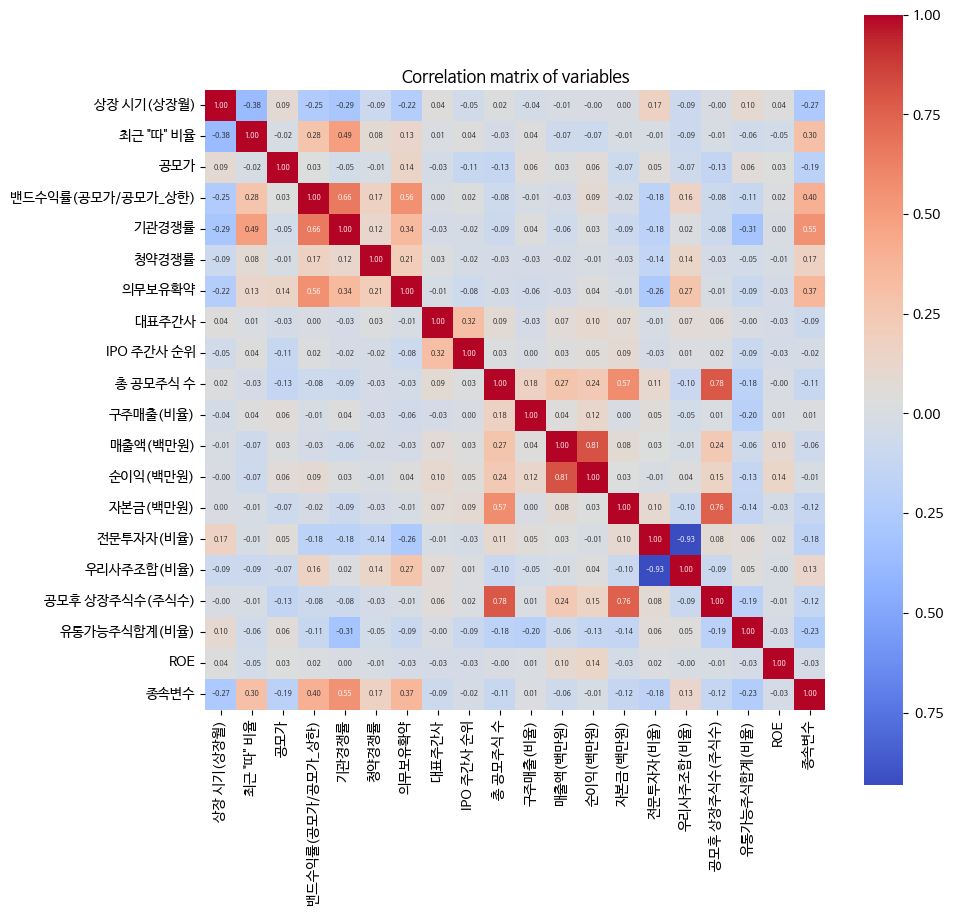

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", square=True, cmap = 'coolwarm' , annot_kws={"size": 5})
plt.title('Correlation matrix of variables')
plt.show()


In [12]:
from scipy.stats import pointbiserialr

X = df.drop('종속변수',  axis=1)
y = df['종속변수']
# y는 이진변수, X는 연속 변수를 나타내는 DataFrame을 가정합니다.
# 각 피처와 목표 변수 사이의 point-biserial correlation 계산
for column in X.columns:
    pbc = pointbiserialr(X[column], y)
    print(f"The correlation between {column} and 종속변수 is {pbc.correlation}")


The correlation between 상장 시기(상장월) and 종속변수 is -0.2731980981217834
The correlation between 최근 "따" 비율 and 종속변수 is 0.3029395256076044
The correlation between 공모가 and 종속변수 is -0.1911934221244352
The correlation between 밴드수익률(공모가/공모가_상한) and 종속변수 is 0.39997884880865286
The correlation between 기관경쟁률 and 종속변수 is 0.5530871010361171
The correlation between 청약경쟁률 and 종속변수 is 0.17130757977608138
The correlation between 의무보유확약 and 종속변수 is 0.3662242303790061
The correlation between 대표주간사 and 종속변수 is -0.08544245859085323
The correlation between IPO 주간사 순위 and 종속변수 is -0.021447197281065887
The correlation between 총 공모주식 수 and 종속변수 is -0.11144281331897282
The correlation between 구주매출(비율) and 종속변수 is 0.014154230200099911
The correlation between 매출액(백만원) and 종속변수 is -0.06402745435003553
The correlation between 순이익(백만원) and 종속변수 is -0.013077649560429682
The correlation between 자본금(백만원) and 종속변수 is -0.1177427699365513
The correlation between 전문투자자(비율) and 종속변수 is -0.17648467268820703
The correlation betw

### 2) 로지스틱회귀분석

In [13]:
import statsmodels.api as sm

# 독립 변수(X)와 종속 변수(y) 설정
X = df.drop('종속변수', axis=1)
y = df['종속변수']

# 로지스틱 회귀 모델 생성
logit_model = sm.Logit(y, sm.add_constant(X))

# 모델 훈련
result = logit_model.fit()

# 결과 출력
result.summary2()


Optimization terminated successfully.
         Current function value: 0.370845
         Iterations 9


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.465      
Dependent Variable: 종속변수             AIC:              657.0866   
Date:               2023-06-15 17:38 BIC:              751.5633   
No. Observations:   832              Log-Likelihood:   -308.54    
Df Model:           19               LL-Null:          -576.70    
Df Residuals:       812              LLR p-value:      1.3192e-101
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     9.0000                                        
------------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025   0.975]
------------------------------------------------------------------
const             -8.3119   4.8129 -1.7270 0.0842 -17.7449  1.1212
상장 시기(상장월)        -0.0844   0.0330 -2.5594 0.0105  -0.1491 -0.0198
최근 "따" 비율          0.9247   0.7212  1.2823 0.1998  -0.4887  2.3382
공모가               -0.0001   0.0000 -6.3621 0.0000  -0.0001 -0.0001
밴드수익률(공모가/공모가_상한) -3.3591   1.2036 -2.7908 0.0053  -5.7181 -1.0000
기관경쟁률              0.0012   0.0004  3.0616 0.0022   0.0004  0.0020
청약경쟁률              0.0019   0.0003  6.3412 0.0000   0.0013  0.0024
의무보유확약             6.2247   0.9243  6.7342 0.0000   4.4130  8.0363
대표주간사             -0.0603   0.0222 -2.7127 0.0067  -0.1039 -0.0167
IPO 주간사 순위         0.0312   0.0214  1.4556 0.1455  -0.0108  0.0733
총 공모주식 수          -0.0000   0.0000 -0.4438 0.6572  -0.0000  0.0000
구주매출(비율)          -0.4337   0.7898 -0.5491 0.5829  -1.9817  1.1142
매출액(백만원)          -0.0000   0.0000 -0.1326 0.8945  -0.0000  0.0000
순이익(백만원)          -0.0000   0.0000 -0.8069 0.4197  -0.0000  0.0000
자본금(백만원)           0.0000   0.0000  0.1060 0.9156  -0.0000  0.0000
전문투자자(비율)         15.0896   6.3426  2.3791 0.0174   2.6584 27.5208
우리사주조합(비율)        16.6388   6.4337  2.5862 0.0097   4.0290 29.2485
공모후 상장주식수(주식수)    -0.0000   0.0000 -2.2671 0.0234  -0.0000 -0.0000
유통가능주식합계(비율)      -4.3011   1.0079 -4.2675 0.0000  -6.2765 -2.3257
ROE                0.0000   0.0001  0.0567 0.9548  -0.0002  0.0002
==================================================================

"""

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


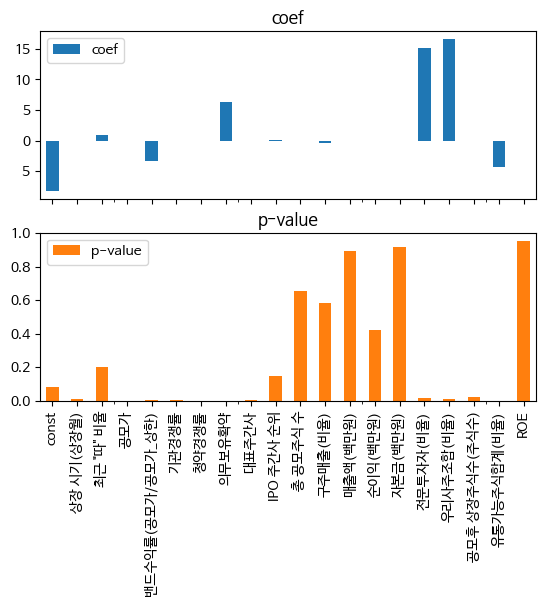

In [15]:
import matplotlib.pyplot as plt

# p-values와 회귀 계수를 DataFrame으로 변환
coef = pd.DataFrame({'coef': result.params, 'p-value': result.pvalues})

# bar plot 그리기
coef.plot(kind='bar', subplots=True)
plt.show()


In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np

def my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5):
    grid_model = GridSearchCV(model, param_grid=param_grid, scoring='accuracy', cv=5, verbose=verbose, n_jobs=n_jobs)

    grid_model.fit(train, y)

    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']

    results = pd.DataFrame(params)
    results['score'] = score

    results = results.sort_values('score', ascending=False)

    return results



# 로지스틱 회귀 모델 정의
logreg = LogisticRegression()

# 하이퍼파라미터 그리드
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'max_iter': [100, 200, 300, 400, 500]}

# 데이터 준비 (X_train과 y_train)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 그리드서치 실행
my_GridSearch(logreg, X_train, y_train, param_grid)



Fitting 5 folds for each of 35 candidates, totalling 175 fits


,C,max_iter,score
17,1.000,300,0.795489
16,1.000,200,0.795489
33,1000.000,400,0.795489
32,1000.000,300,0.795489
31,1000.000,200,0.795489
29,100.000,500,0.795489
28,100.000,400,0.795489
27,100.000,300,0.795489
26,100.000,200,0.795489
24,10.000,500,0.795489


In [15]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(C=1, max_iter=300)
logreg.fit(X_train, y_train)

print("Logistic Regression Score: ", logreg.score(X_test, y_test))

logreg_pred = logreg.predict(X_test)
print("Logistic Regression: ")
print(confusion_matrix(y_test, logreg_pred))
print(classification_report(y_test, logreg_pred))

Logistic Regression Score:  0.7425149700598802
Logistic Regression: 
[[45 32]
 [11 79]]
              precision    recall  f1-score   support

           0       0.80      0.58      0.68        77
           1       0.71      0.88      0.79        90

    accuracy                           0.74       167
   macro avg       0.76      0.73      0.73       167
weighted avg       0.75      0.74      0.74       167



### 3) 결정나무 CART


In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np

def my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5):
    grid_model = GridSearchCV(model, param_grid=param_grid, scoring='accuracy', cv=5, verbose=verbose, n_jobs=n_jobs)

    grid_model.fit(train, y)

    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']

    results = pd.DataFrame(params)
    results['score'] = score

    results = results.sort_values('score', ascending=False)

    return results

# Decision Tree 모델 정의
dt = DecisionTreeClassifier()

# 하이퍼파라미터 그리드
param_grid = {'max_depth': list(range(1, 8)),
              'min_samples_split': list(range(5, 10)),
              'min_samples_leaf': list(range(5, 10)),
              'max_leaf_nodes': list(range(10, 19)),  # 추가
              'max_features': ['auto', 'log2'],  # 추가
              'criterion' : ['gini', 'entropy']
             }

# 데이터 준비 (X_train과 y_train)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 그리드서치 실행
my_GridSearch(dt, X_train, y_train, param_grid)

Fitting 5 folds for each of 6300 candidates, totalling 31500 fits


,criterion,max_depth,max_features,max_leaf_nodes,min_samples_leaf,min_samples_split,score
2171,gini,5,log2,15,9,6,0.831579
5948,entropy,7,auto,13,9,8,0.828571
6126,entropy,7,log2,12,5,6,0.827068
1928,gini,5,auto,15,5,8,0.827068
6247,entropy,7,log2,16,9,7,0.825564
...,...,...,...,...,...,...,...
422,gini,1,log2,17,9,7,0.572932
3257,entropy,1,auto,14,6,7,0.568421
3558,entropy,1,log2,17,6,8,0.566917
3495,entropy,1,log2,14,9,5,0.554887


Accuracy:  0.7904191616766467
Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.73      0.76        77
           1       0.78      0.84      0.81        90

    accuracy                           0.79       167
   macro avg       0.79      0.79      0.79       167
weighted avg       0.79      0.79      0.79       167



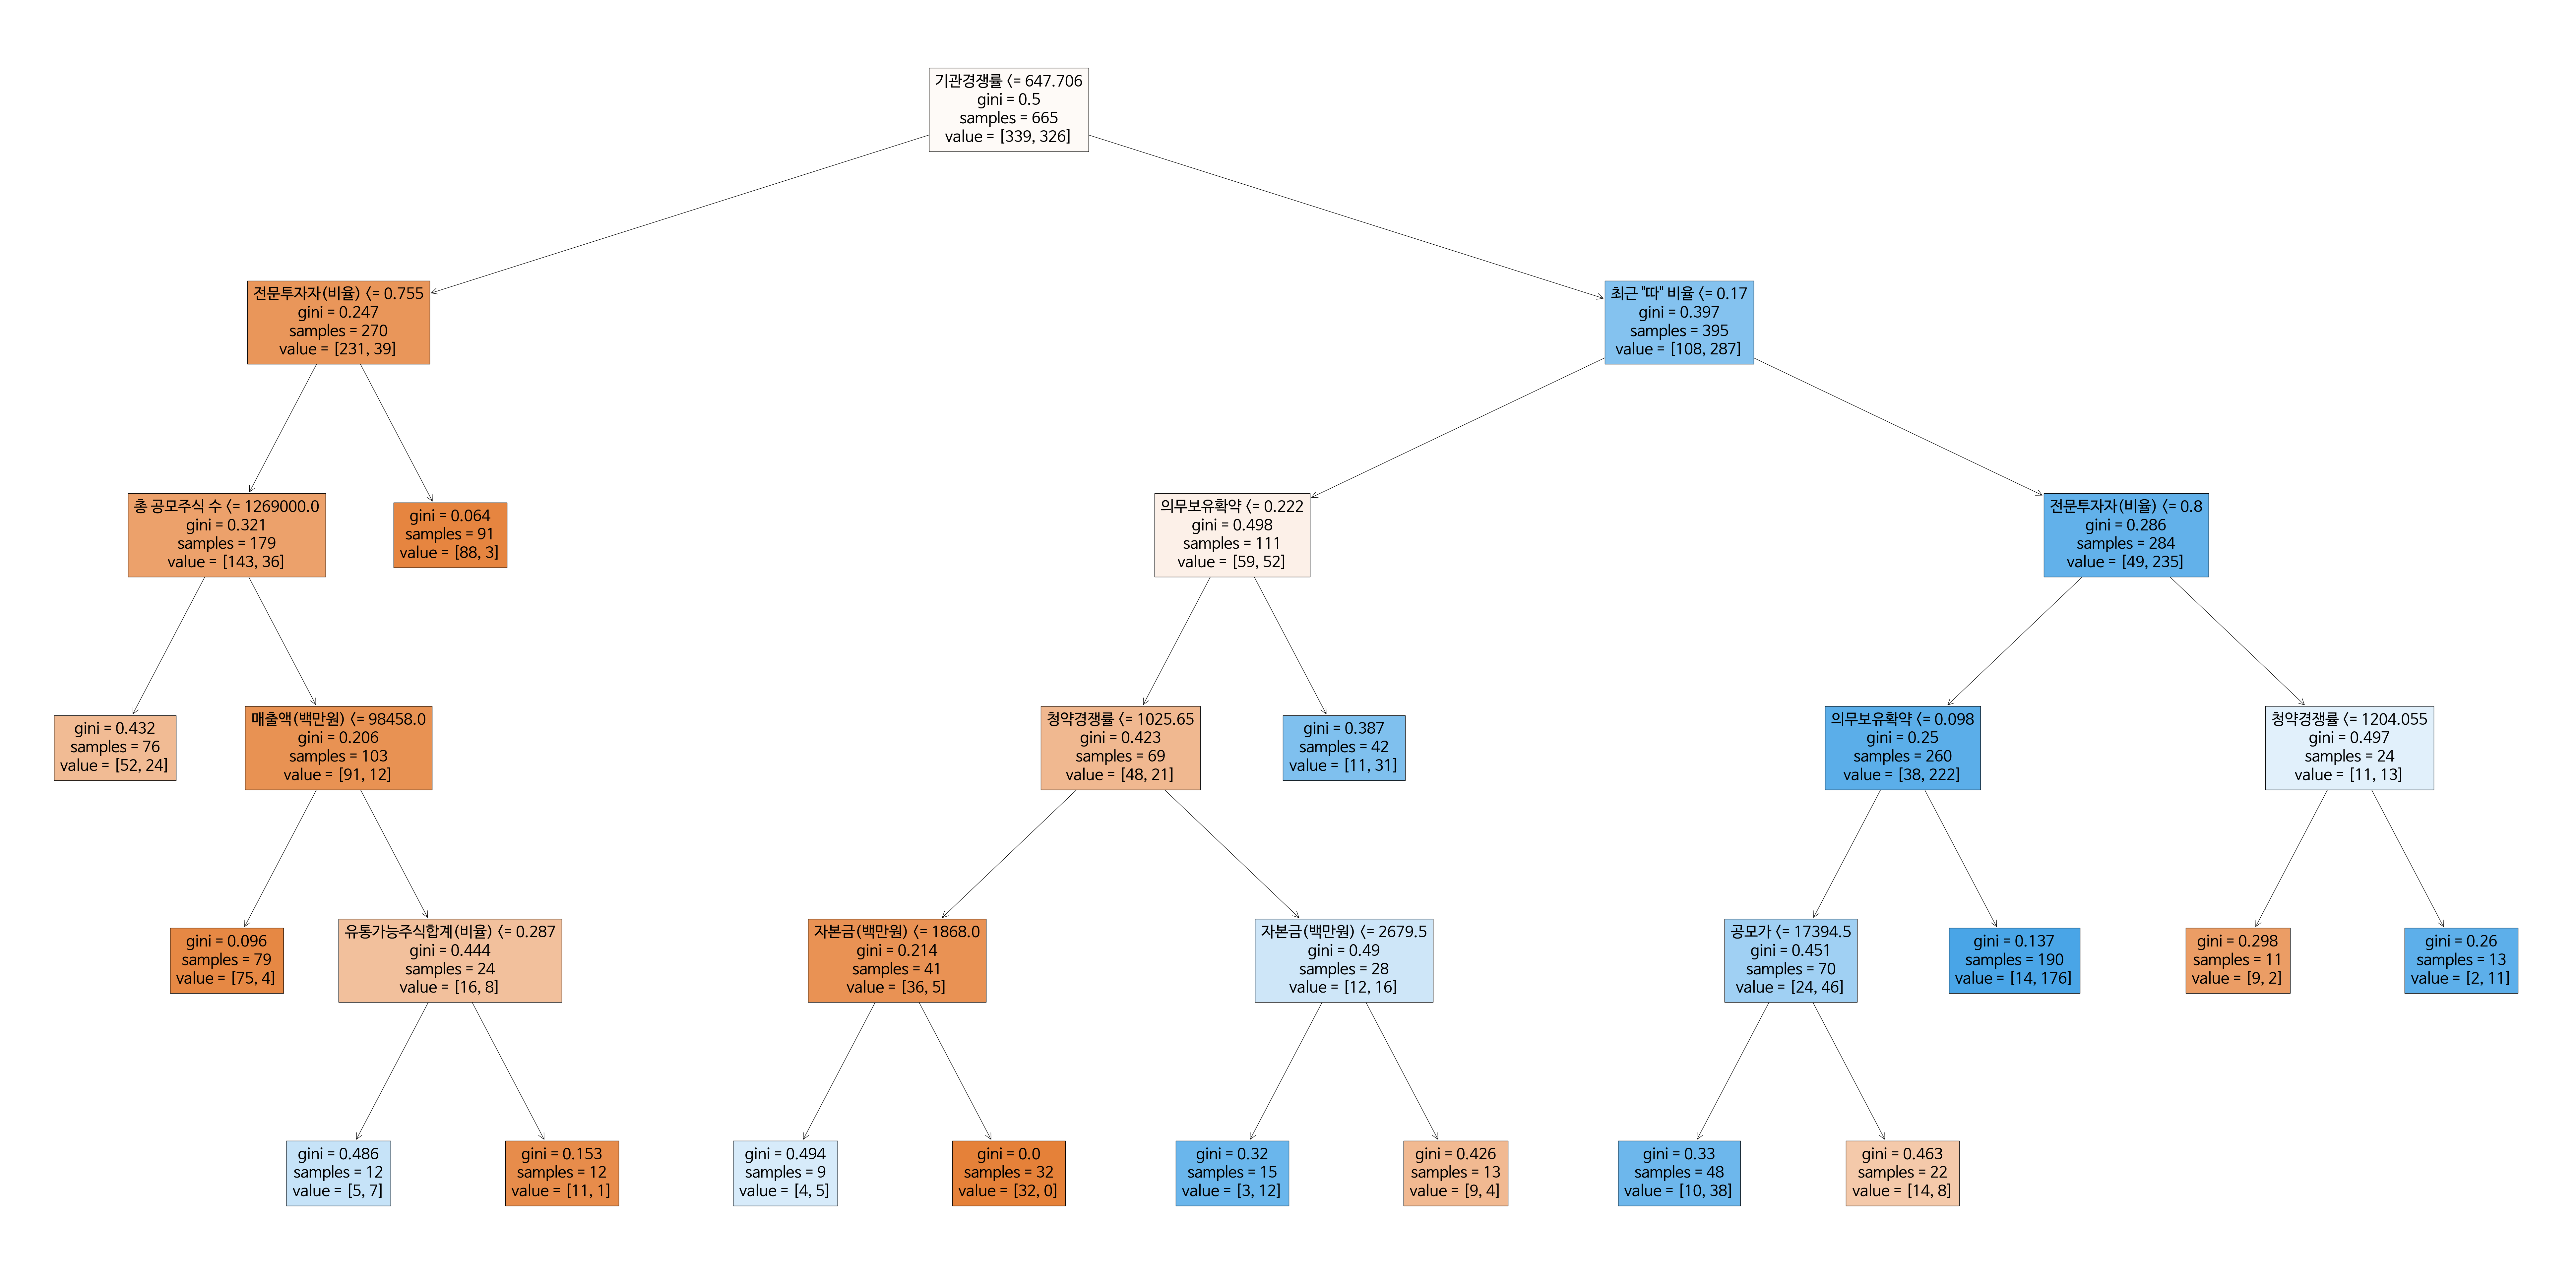

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Split data into training and test sets


# Define the classifier
dtc = DecisionTreeClassifier(criterion="gini", max_depth=5, max_features='log2', max_leaf_nodes=15, min_samples_leaf=9, min_samples_split=6)

# Fit the classifier to the training data
dtc.fit(X_train, y_train)

# Predict on the test data
y_pred = dtc.predict(X_test)

# Measure the performance
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))

# Visualize the tree
plt.figure(figsize=(100,50))
plot_tree(dtc, filled=True, feature_names=X.columns)
plt.show()


### 4) 결정나무 C 5.0

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


Accuracy:  0.8023952095808383
Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.79      0.79        77
           1       0.82      0.81      0.82        90

    accuracy                           0.80       167
   macro avg       0.80      0.80      0.80       167
weighted avg       0.80      0.80      0.80       167



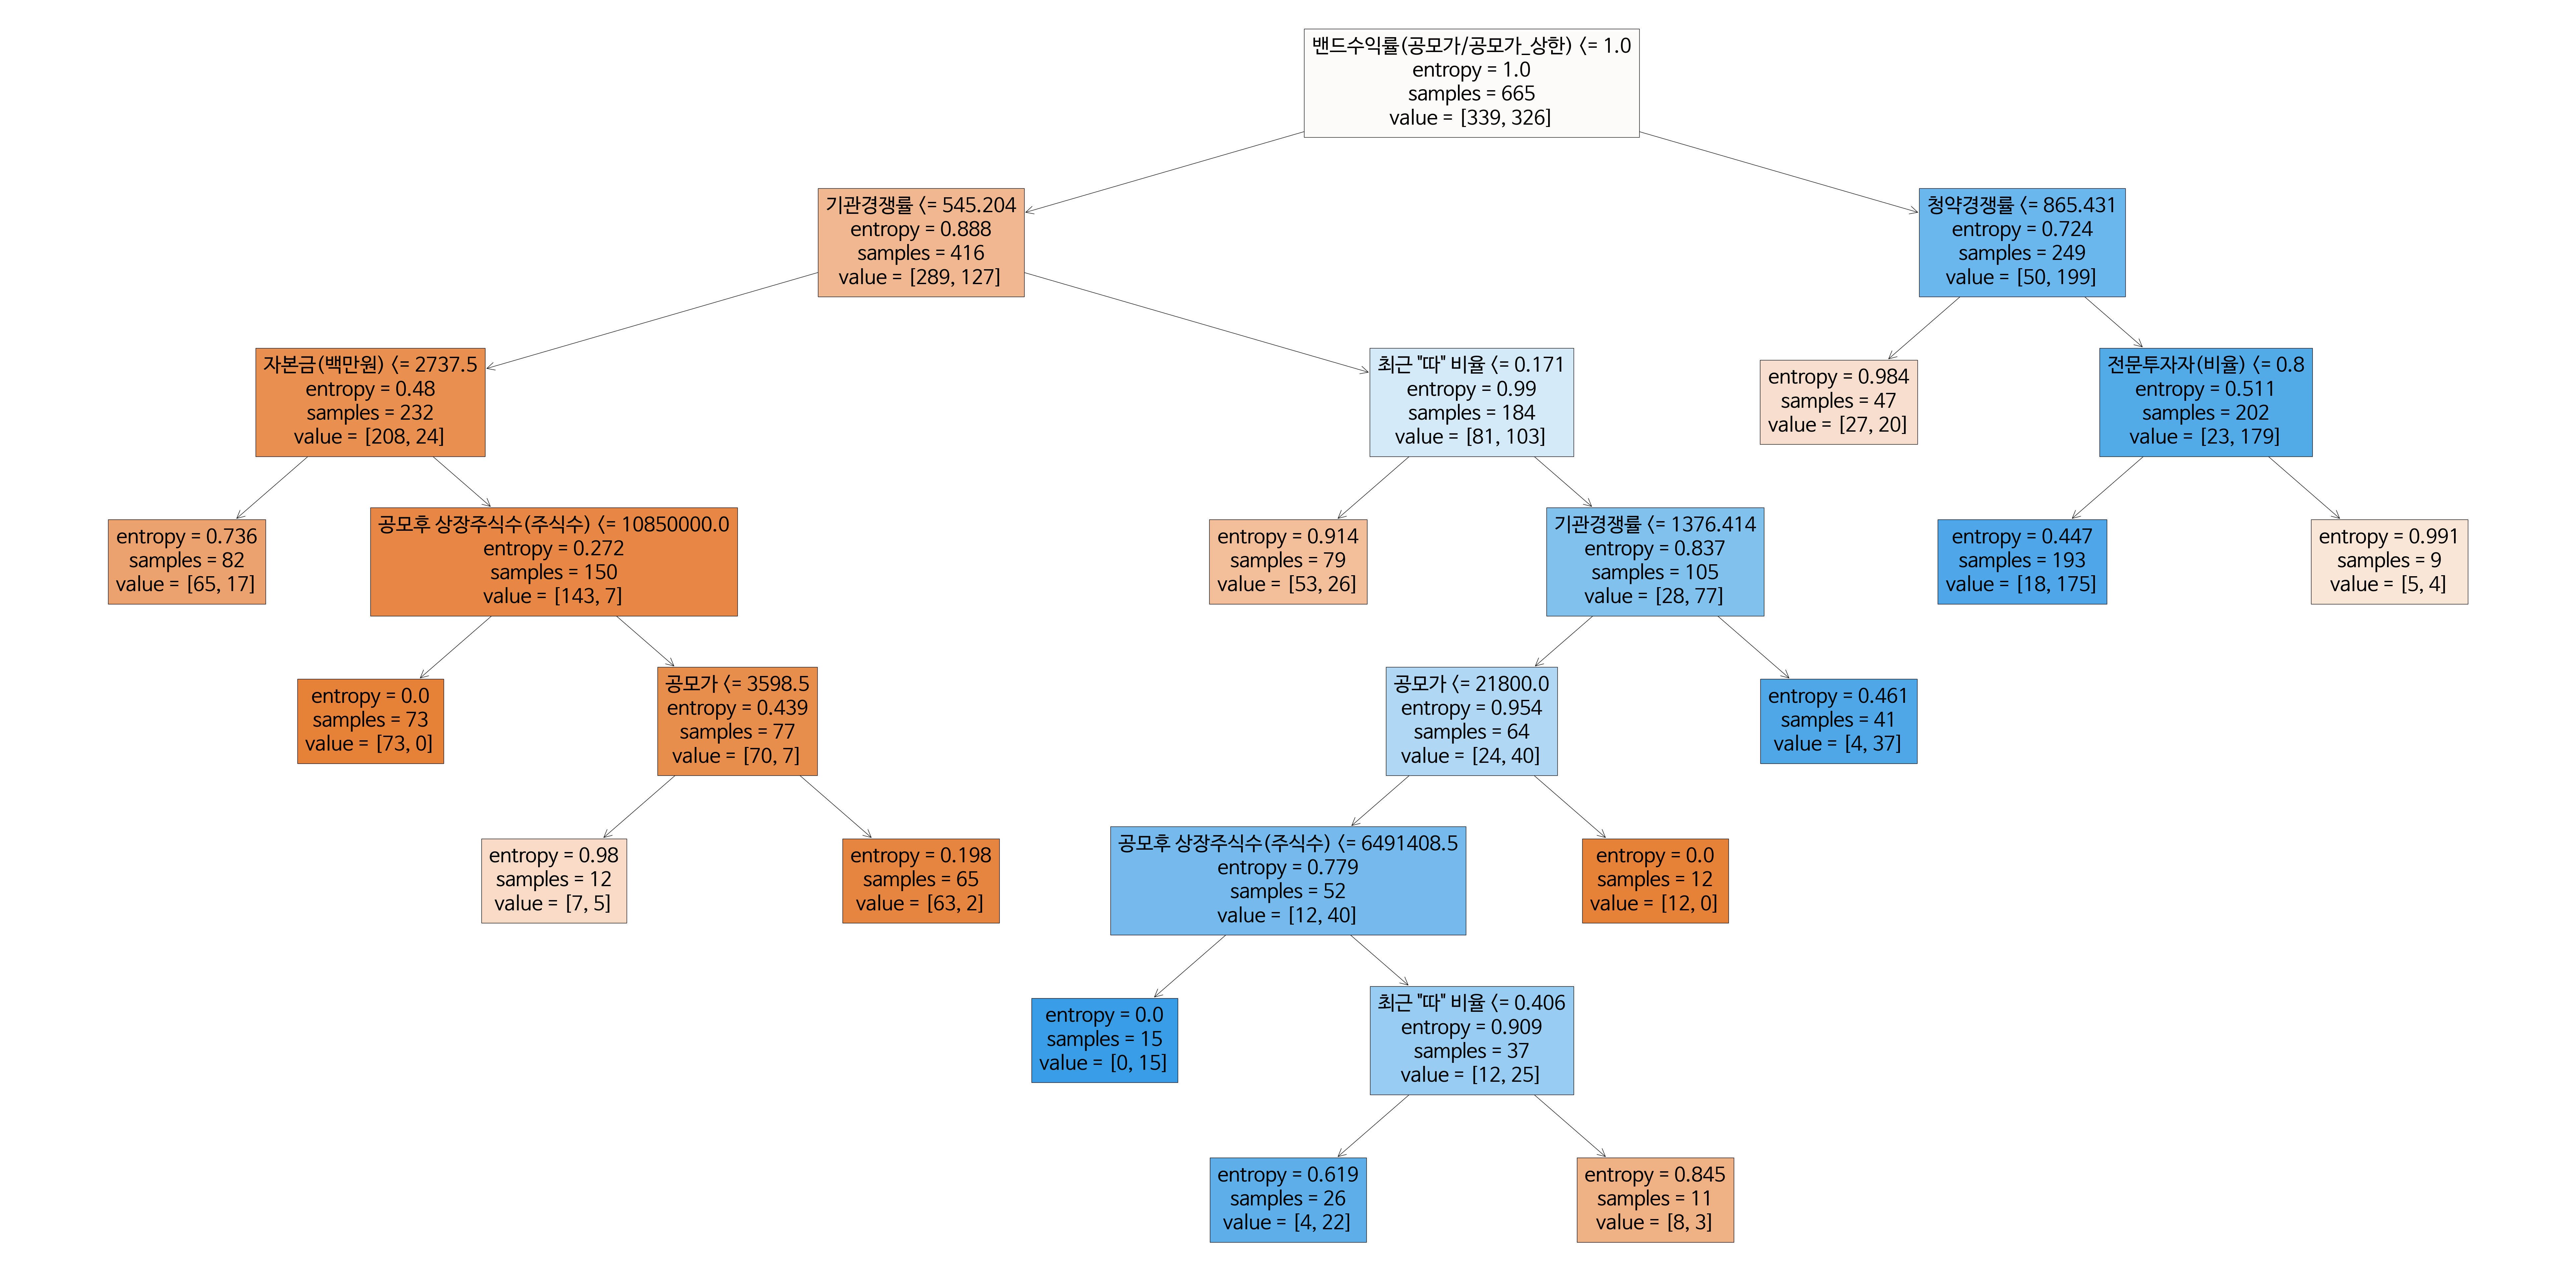

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Split data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the classifier
dtc = DecisionTreeClassifier(criterion="entropy", max_depth=7, max_features='auto', max_leaf_nodes=13, min_samples_leaf=9, min_samples_split=8)

# Fit the classifier to the training data
dtc.fit(X_train, y_train)

# Predict on the test data
y_pred = dtc.predict(X_test)

# Measure the performance
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))

# Visualize the tree
plt.figure(figsize=(100,50))
plot_tree(dtc, filled=True, feature_names=X.columns)
plt.show()
